# Plotting with python

From the excellent:  
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb

Gallery:  
http://matplotlib.org/gallery.html

Tutorial:  
http://www.labri.fr/perso/nrougier/teaching/matplotlib/  
http://matplotlib.org/users/recipes.html

In [10]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
import os
import numpy as np
import pandas as pd
import random
import string
import tensorflow as tf
import urllib
import zipfile
import time
import re
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Seaborn examples

http://twiecki.github.io/blog/2014/11/18/python-for-data-science/

https://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html

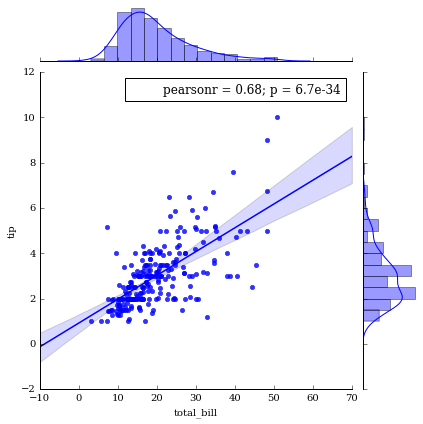

In [96]:
# Load one of the data sets that come with seaborn
tips = sns.load_dataset("tips")

_ = sns.jointplot("total_bill", "tip", tips, kind='reg')

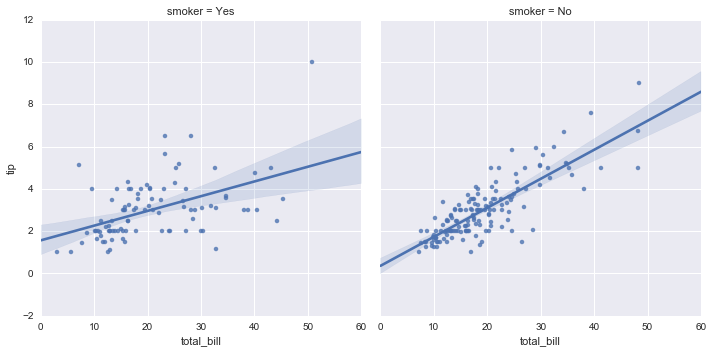

In [4]:
sns.lmplot("total_bill", "tip", tips, col="smoker");


matplotlib object-oriented API
-----------

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). 

The real advantage of this approach becomes apparent when ***more than one figure*** is created, or when a figure contains ***more than one subplot***.

We store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance axes using the `add_axes` method in the Figure class instance `fig`.

In [8]:
# set some x,y variables to play with
x = np.linspace(0, 5, 10)
y = x ** 2

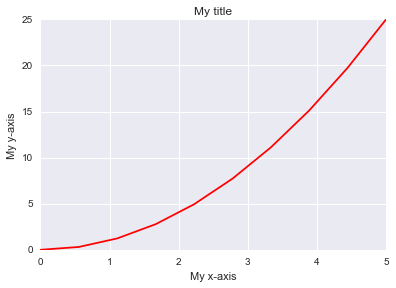

In [35]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('My x-axis')
axes.set_ylabel('My y-axis')
axes.set_title('My title'); # use ";" symbol to remove outputting of object

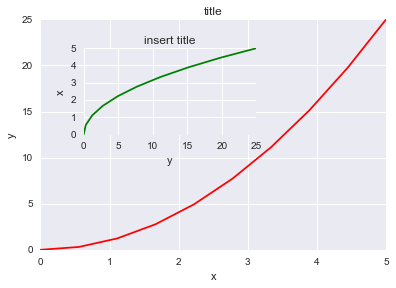

In [36]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

Subplots
--------

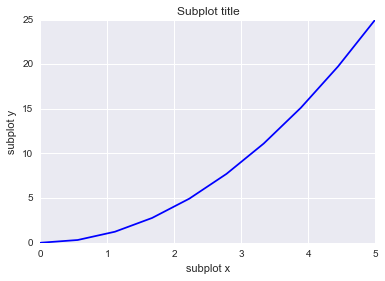

In [39]:
fig, axes = plt.subplots()

axes.plot(x, y, 'b')
axes.set_xlabel('subplot x')
axes.set_ylabel('subplot y')
axes.set_title('Subplot title');

/Users/jjl/anaconda/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/jjl/anaconda/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


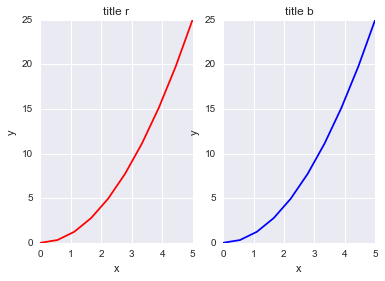

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)

colors = ['r', 'b', 'y']
for ax in axes:
    idx = np.where(axes==ax)[0].astype(int)
    ax.plot(x, y, colors[idx])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title ' + colors[idx])

/Users/jjl/anaconda/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/jjl/anaconda/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


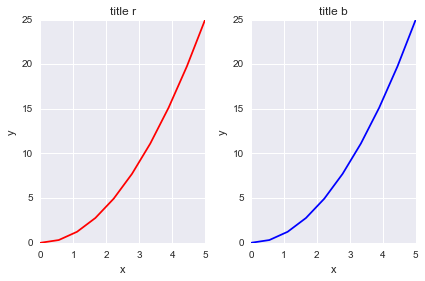

In [15]:
# using the fig.tight_layout method, which automatically adjusts the positions of the axes 
# on the figure canvas so that there is no overlapping content
fig, axes = plt.subplots(nrows=1, ncols=2)

colors = ['r', 'b', 'y']
for ax in axes:
    idx = np.where(axes==ax)[0].astype(int)
    ax.plot(x, y, colors[idx])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title ' + colors[idx])
    
fig.tight_layout()

Figure size, aspect ratio and DPI
----------
Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created, using the figsize and dpi keyword arguments. 

- `figsize` is a tuple of the width and height of the figure in inches
- `dpi` is the dots-per-inch (pixel per inch)

In [16]:
fig = plt.figure(figsize=(8,4), dpi=100)

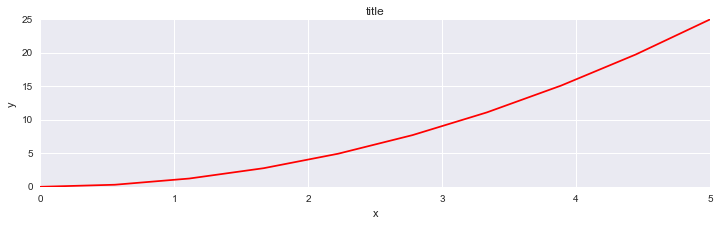

In [22]:
fig, axes = plt.subplots(figsize=(12,3), dpi=100)

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

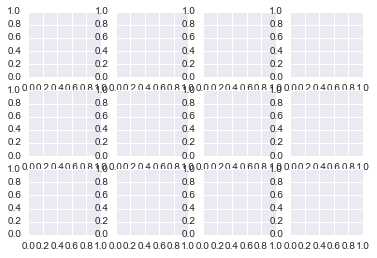

In [3]:
# use a loop to set subplots
for i in range(12):
    plt.subplot(3,4, i+1)

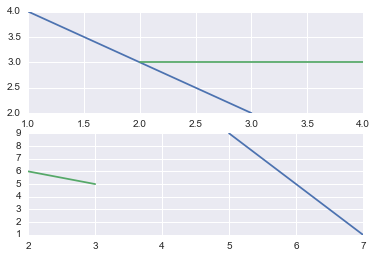

In [28]:
fig = plt.figure()

ax1 = fig.add_subplot(211)
ax1.plot([(1, 2), (3, 4)], [(4, 3), (2, 3)])

ax2 = fig.add_subplot(212)
ax2.plot([(7, 2), (5, 3)], [(1, 6), (9, 5)]);


Saving figures
---------

In [ ]:
fig.savefig("filename.png", dpi=200)
! pwd
! ls -l

Legends, labels and titles
-------

http://matplotlib.org/users/legend_guide.html#legend-location

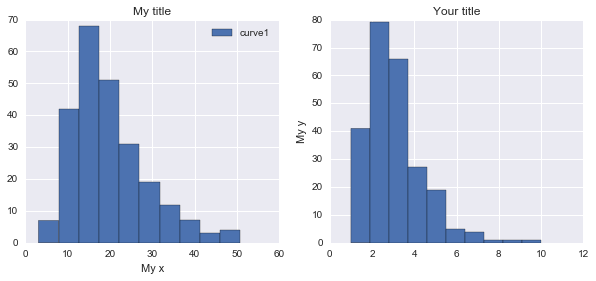

In [50]:
fig, axs = plt.subplots(1,2, figsize=(10,4), dpi=100)

tips['total_bill'].hist(ax=axs[0]).set_title("My title")
axs[0].set_xlabel("My x")
axs[0].legend(["curve1", "curve2", "curve3"])

tips['tip'].hist(ax=axs[1]).set_title("Your title")
axs[1].set_ylabel("My y");


In [58]:
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

In [ ]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

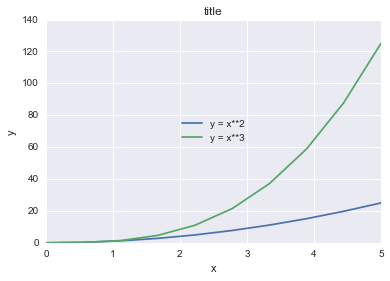

In [74]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=10); # set loc to value 0-10
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

Formatting text: LaTeX, fontsize, font family
----------

In [89]:
matplotlib.rcdefaults()

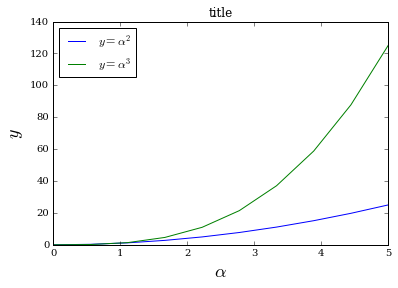

In [97]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

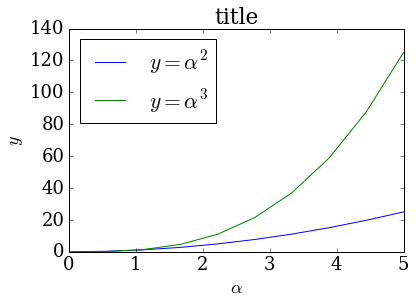

In [98]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

In [112]:
print plt.style.available

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [107]:
plt.style.use('seaborn-darkgrid')

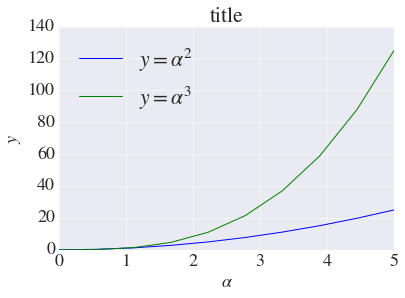

In [108]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

In [82]:
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})

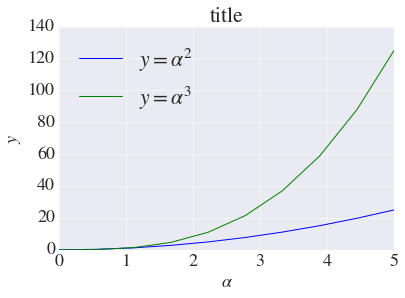

In [113]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

Setting colors, linewidths, linetypes
--------------

In [114]:
# MATLAB style line color and style 
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

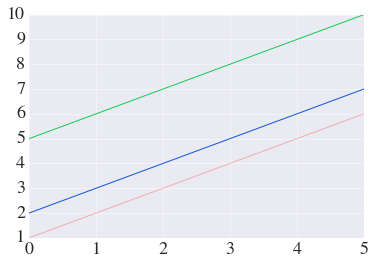

In [122]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.25) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+5, color="#15cc55");       # RGB hex code for a greenish colo

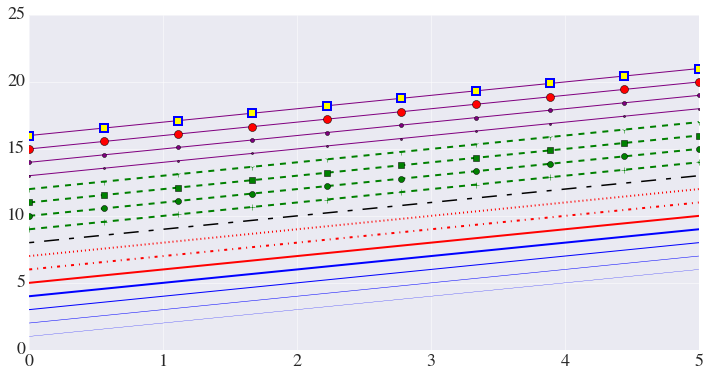

In [123]:
# change the line width using linewidth or lw keyword
# line style can be selected using the linestyle or ls 

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");


Control over axis appearance
--------

- Plot range
- Logarithmic scale
- Placement of ticks and custom tick labels
- Scientific notation
- Axis number and axis label spacing
- Axis position adjustments
- Axis grid
- Axis spines
- Twin axes


In [295]:
matplotlib.rcdefaults()
plt.style.use('seaborn-darkgrid')

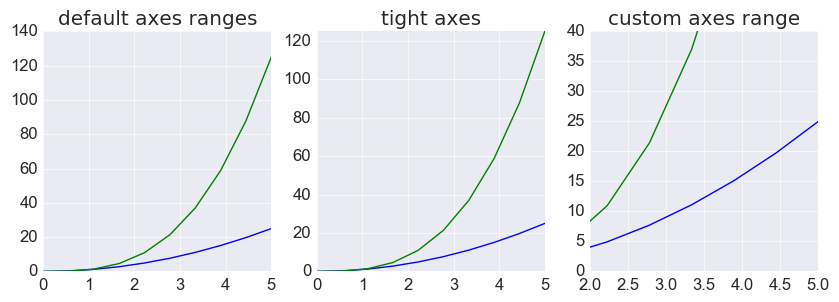

In [296]:
# Plot range
# using the set_ylim and set_xlim methods in the axis object
# or axis('tight') for automatrically getting "tightly fitted" axes ranges

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 40])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

In [145]:
matplotlib.rcParams.update({'font.size': 10})

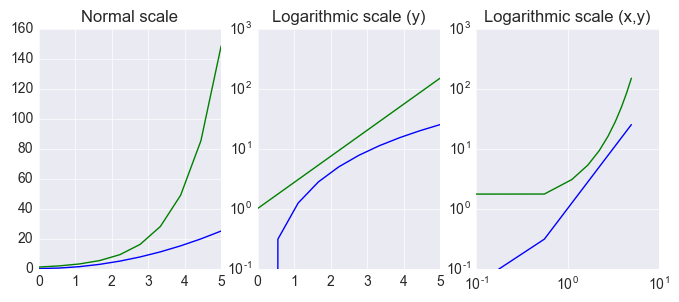

In [156]:
# Logarithmic scale
# Each of the axes' scales are set seperately using `set_xscale` and `set_yscale`
fig, axes = plt.subplots(1, 3, figsize=(8,3))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

axes[2].plot(x, x**2, x, np.exp(x))
axes[2].set_xscale("log")
axes[2].set_yscale("log")
axes[2].set_title("Logarithmic scale (x,y)");

### Placement of ticks and custom tick labels

- We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. 
- We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels

http://matplotlib.org/api/ticker_api.html

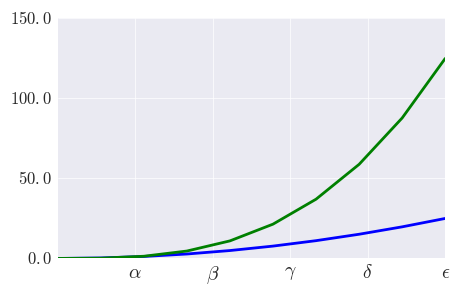

In [193]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=14)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=12); # use LaTeX formatted labels

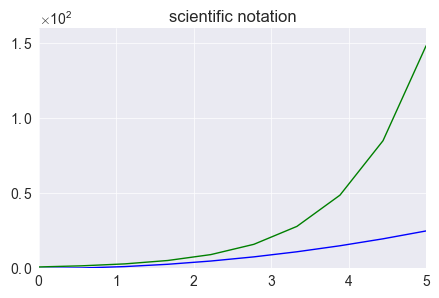

In [188]:
# Scientific notation
fig, ax = plt.subplots(1, 1, figsize=(5,3))
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter)

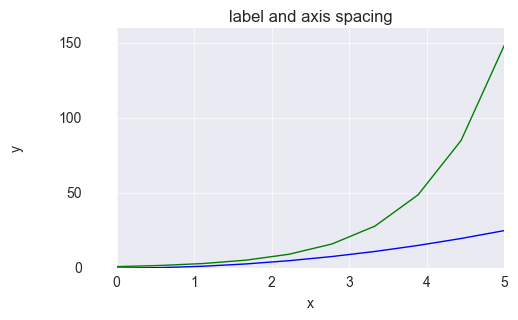

In [208]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] =25

fig, ax = plt.subplots(1, 1, figsize=(5,3))
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 25

ax.set_xlabel("x")
ax.set_ylabel("y");

# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

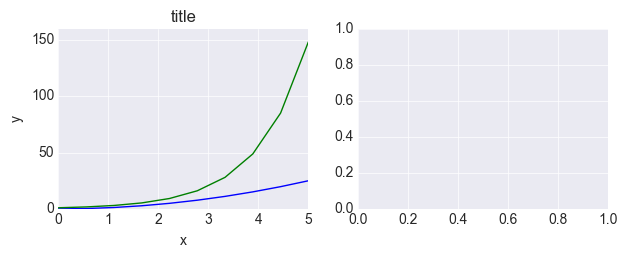

In [236]:
# Axis position adjustments
fig, ax = plt.subplots(1, 2, figsize=(10,3))
      
ax[0].plot(x, x**2, x, np.exp(x))
ax[0].set_yticks([0, 50, 100, 150])

ax[0].set_title("title")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.7, bottom=0.3, top=0.9);

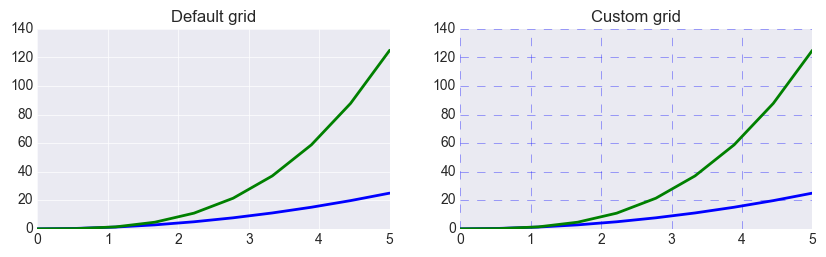

In [240]:
# Axis grid
fig, axes = plt.subplots(1, 2, figsize=(10,2.5))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)
axes[0].set_title('Default grid')

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes[1].set_title('Custom grid');

In [288]:
matplotlib.rcdefaults()
plt.style.use('seaborn-ticks')

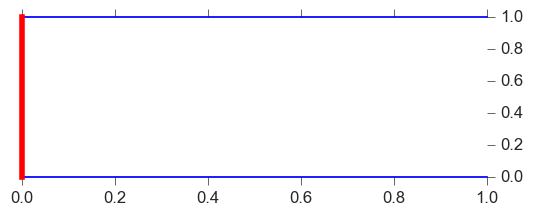

In [289]:
# Axis spines
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(4)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_right() # only ticks on one side

### Twin axes

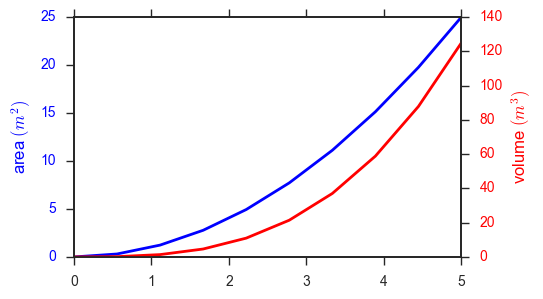

In [276]:
# Twin axes
fig, ax1 = plt.subplots(figsize=(5,3))

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=12, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=12, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Axes with zero for x & y


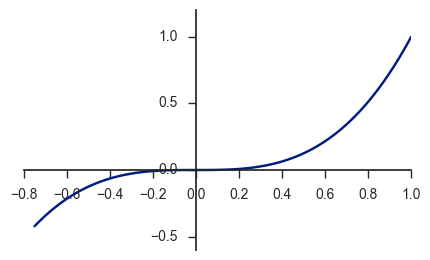

In [279]:
fig, ax = plt.subplots(figsize=(5,3))

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

2D plot styles: other
-----------
http://matplotlib.org/gallery.html


In [282]:
n = np.array([0,1,2,3,4,5])

In [303]:
matplotlib.rcdefaults()
plt.style.use('ggplot')

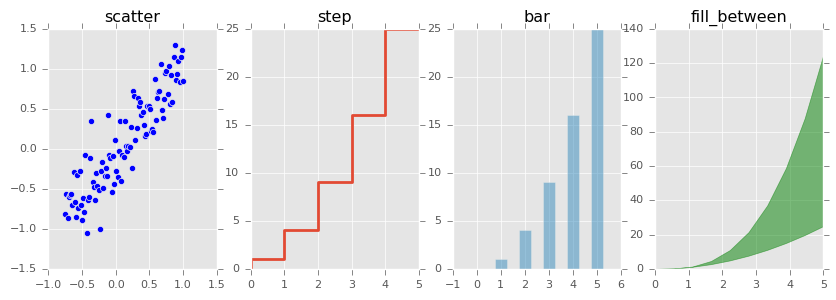

In [309]:
matplotlib.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(1, 4, figsize=(10,3))

# scatter
axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

# step
axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

# bar
axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

# fill between lines
axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

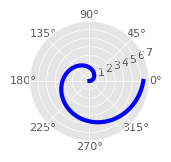

In [314]:
# polar plot using add_axes and polar projection
fig = plt.figure(figsize=(6,2))
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);

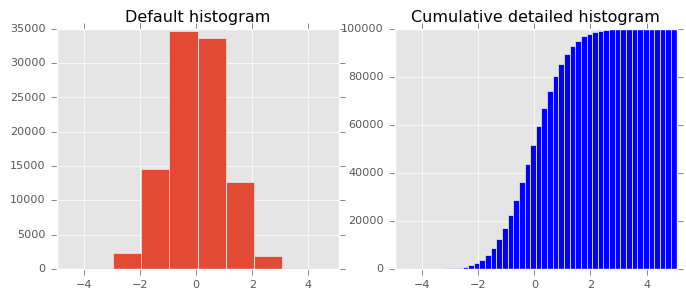

In [316]:
# histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(8,3))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50, color='b')
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

Text annotation
--------

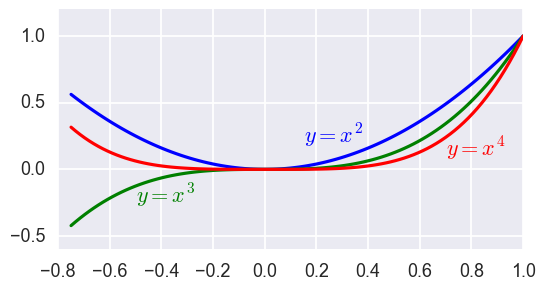

In [357]:
fig, ax = plt.subplots(figsize=(6,3))

ax.plot(xx, xx**2, xx, xx**3, xx, xx**4)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=16, color="blue")
ax.text(-0.5, -0.25, r"$y=x^3$", fontsize=16, color="green")
ax.text(0.7, 0.1, r"$y=x^4$", fontsize=16, color="red");

Multiple subplots & insets
-----------

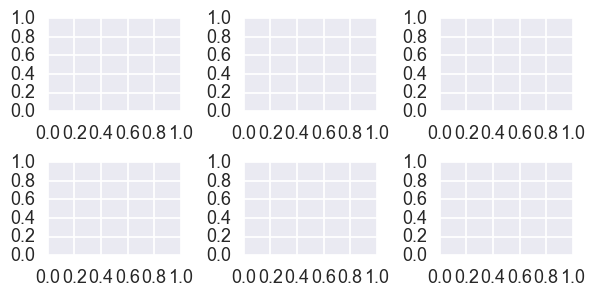

In [360]:
# subplots
fig, ax = plt.subplots(2, 3, figsize=(6,3))
fig.tight_layout()

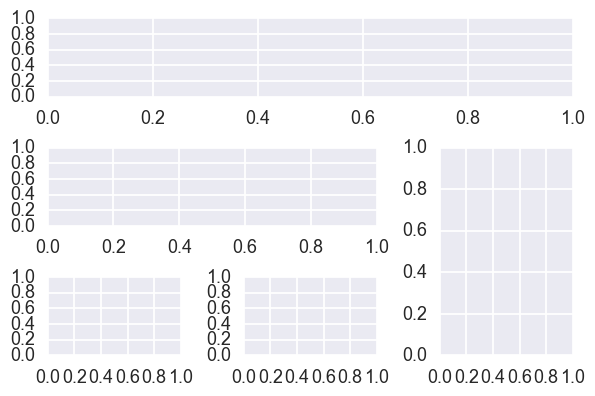

In [385]:
# subplot2grid
fig = plt.figure(figsize=(6,4))
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

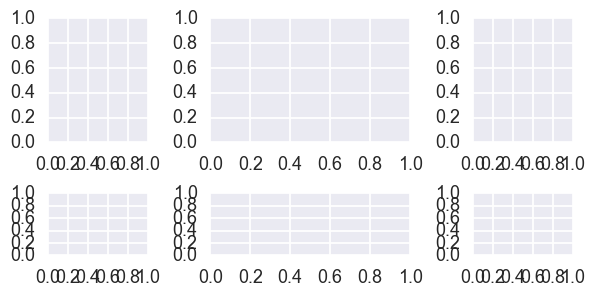

In [386]:
# gridspec
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(6,3))

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

### add axes

In [393]:
plt.style.use('default')
#plt.style.use('ggplot')

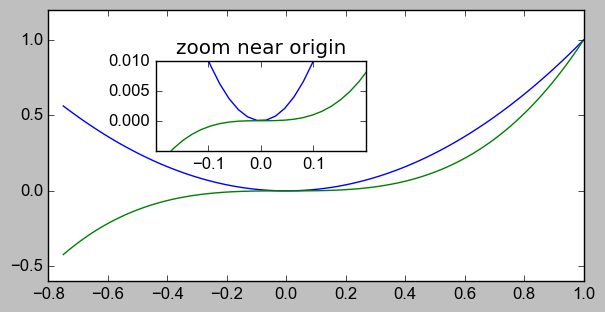

In [410]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()
fig.set_figheight(3)
fig.set_figwidth(6)

# inset
inset_ax = fig.add_axes([0.25, 0.5, 0.35, 0.3]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### Colormap and contour figures


In [411]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [412]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

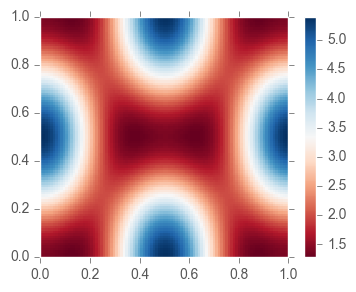

In [419]:
# pcolor
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(4,3))

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

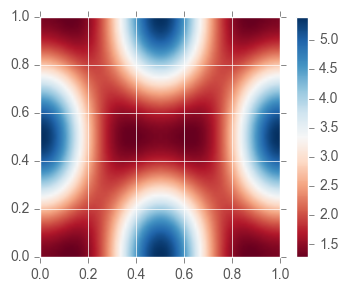

In [420]:
# imshow
fig, ax = plt.subplots(figsize=(4,3))

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

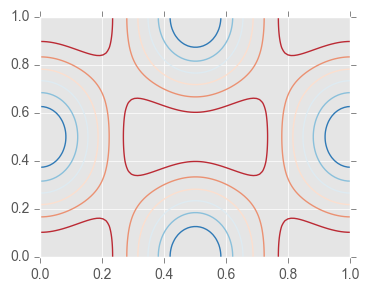

In [421]:
# contour
fig, ax = plt.subplots(figsize=(4,3))

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

### 3d figures

In [423]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

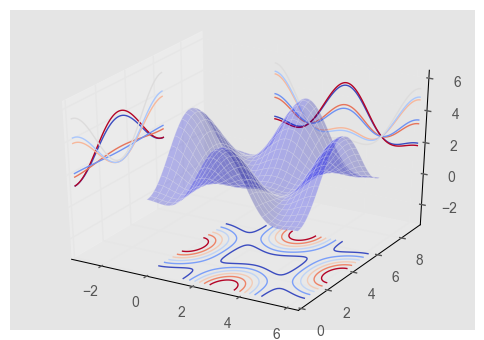

In [425]:
# Coutour plots with projections
fig = plt.figure(figsize=(6,4))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

### Change the 3d view angle

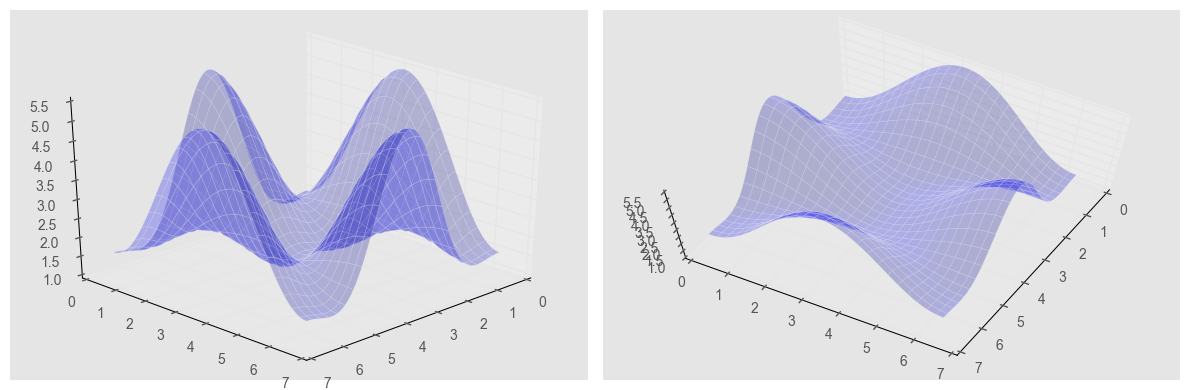

In [426]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()

### Animations

With the `FuncAnimation` function we can generate a movie file from sequences of figures. The function takes the following arguments: 
- `fig`: a figure canvas
- `func`: a function that we provide which updates the figure
- `init_func`: a function we provide to setup the figure
- `frame`: the number of frames to generate
- `blit`: tells the animation function to only update parts of the frame which have changed (for smoother animations)

```
from matplotlib import animation
def init():
    # setup figure

def update(frame_counter):
    # update figure for new frame

anim = animation.FuncAnimation(fig, update, init_func=init, frames=200, blit=True)

anim.save('animation.mp4', fps=30) # fps = frames per second
```

Pandas
------
- http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html  
- http://nbviewer.jupyter.org/gist/fonnesbeck/5850463

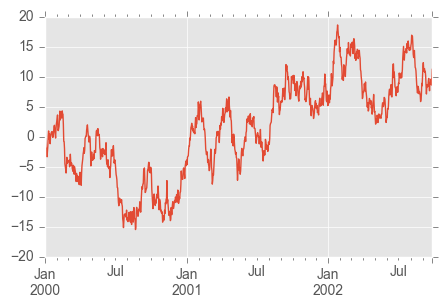

In [433]:
# http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
_ = ts.plot(figsize=(5,3))

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


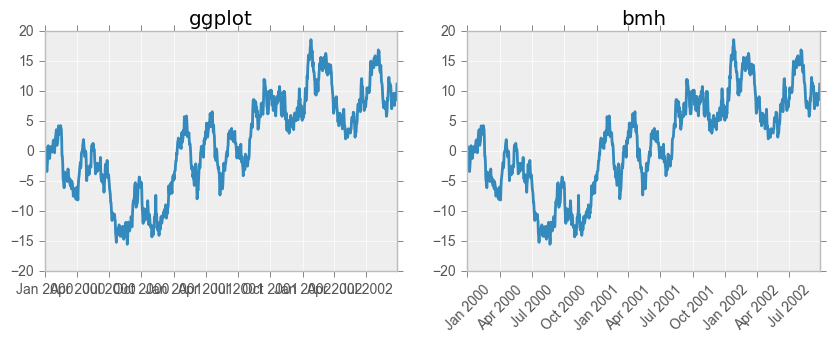

In [458]:
print plt.style.available

fig, axs = plt.subplots(1,2, figsize=(10,3), dpi=100)

plt.style.use('ggplot')
axs[0].plot(ts)
axs[0].set_title('ggplot')

plt.style.use('bmh')
axs[1].plot(ts)
axs[1].set_title('bmh')
plt.xticks(rotation=45);


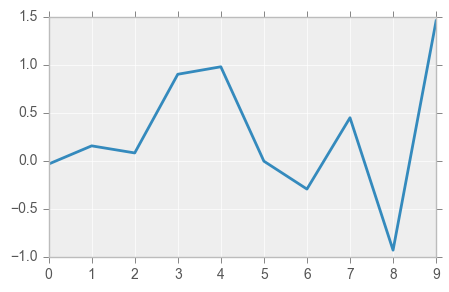

In [461]:
normals = pd.Series(np.random.normal(size=10))
normals.plot(figsize=(5,3));

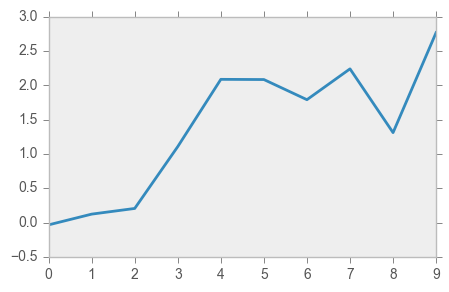

In [463]:
normals.cumsum().plot(grid=False, figsize=(5,3));

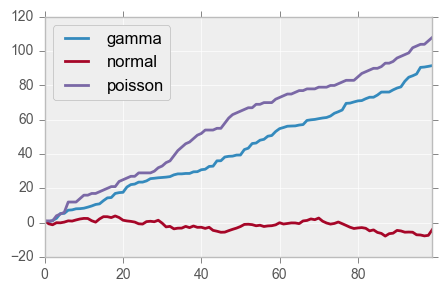

In [465]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot(figsize=(5,3));

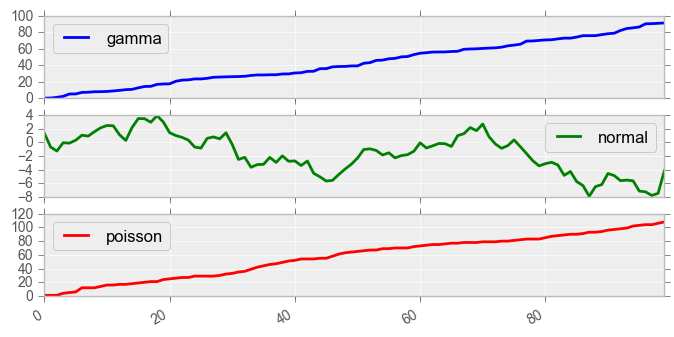

In [470]:
variables.cumsum(0).plot(subplots=True, figsize=(8,4));

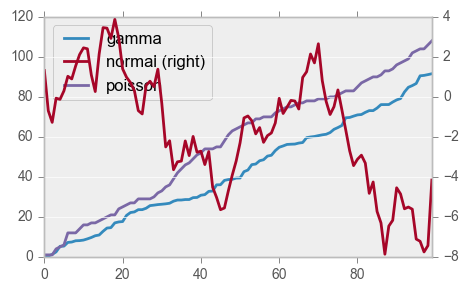

In [477]:
variables.cumsum(0).plot(secondary_y='normal', figsize=(5,3));

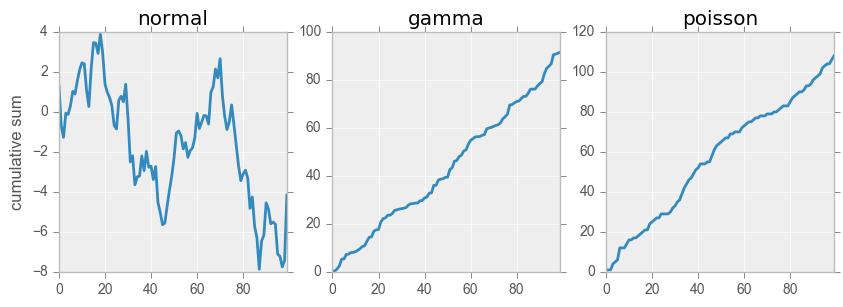

In [479]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum');

### Bar plots

In [11]:
# Load the wholesale customers dataset
try:
    df = pd.read_csv("../reviewer-projects/customer-segments-reviews/01-working/customers.csv")
    #df.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*df.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 8 features each.


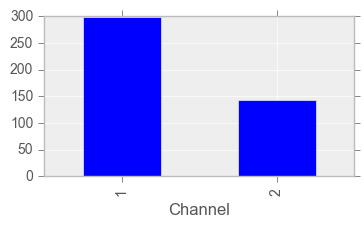

In [504]:
df.groupby(['Channel']).Region.count().plot(kind='bar', figsize=(4,2));

### Scatter plots

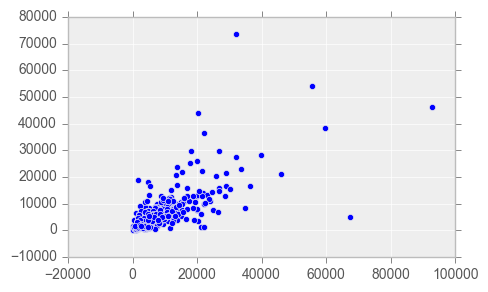

In [510]:
plt.figure(figsize=(5,3))
plt.scatter(df.Grocery, df.Milk);

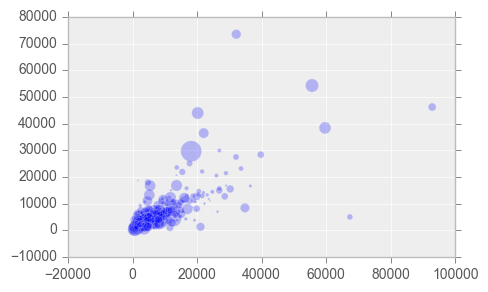

In [520]:
plt.figure(figsize=(5,3))
plt.scatter(df.Grocery, df.Milk, s=df.Fresh*.002, alpha=0.25);

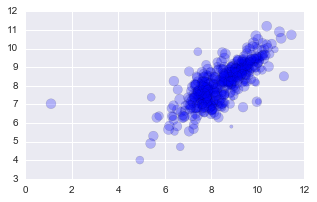

In [12]:
df_log = np.log(df[df.columns[2:]])
plt.figure(figsize=(5,3))
plt.scatter(df_log.Grocery, df_log.Milk, s=df_log.Fresh*10, alpha=0.25);

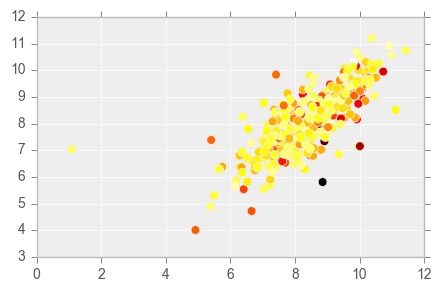

In [547]:
plt.figure(figsize=(5,3))
plt.scatter(df_log.Grocery, df_log.Milk, c=df_log.Fresh, s=40, cmap='hot');

### Trellis plots


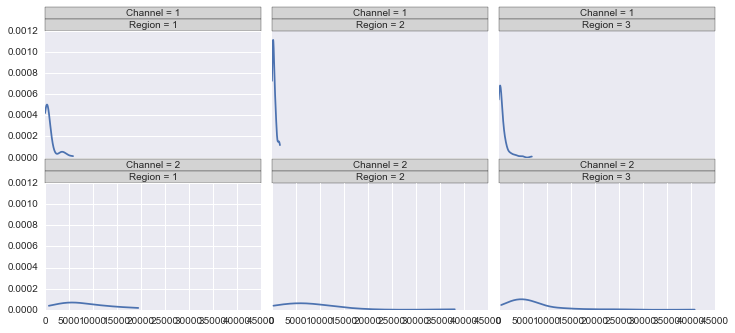

In [28]:
from pandas.tools.rplot import *

plt.figure(figsize=(12,5))
tp = RPlot(df, x='Detergents_Paper')
tp.add(TrellisGrid(['Channel', 'Region']))
tp.add(GeomDensity())
_ = tp.render()